In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

<Figure size 1000x500 with 0 Axes>

In [75]:
df_raw = pd.read_csv("stores_sales_forecasting.csv", encoding='latin1')
df_raw.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [76]:
df_raw.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [77]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [78]:
df_raw.shape

(2121, 21)

In [79]:
df_raw.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


Data set info:

1. The dataset contains 2,121 order-level records, indicating a reasonably sized retail dataset suitable for exploratory and business analysis.
2. Sales values are right-skewed, with a median of ~182 and a mean of ~350, suggesting that most orders are small while a few large orders significantly increase total revenue.
3. Customers typically purchase low quantities per order, with a median quantity of 3 and 75% of orders having 5 units or fewer.
4. Discounts are frequently applied, with a median discount of 20%. However, discounts vary widely, reaching up to 70%, which may impact profitability.
5. Profit shows high variability, including significant losses (minimum profit of -1862), indicating that some orders are unprofitable despite generating sales.
6. The large difference between minimum and maximum profit highlights the importance of analyzing discount strategies, product mix, and shipping decisions.
7. Postal Code appears as a numeric field but represents categorical location data and should not be treated as a continuous numeric variable in analysis. (Needs to be changed while cleaning)

Overall, the summary statistics suggest a realistic retail dataset with opportunities to analyze sales performance, profitability drivers, and operational inefficiencies.

In [80]:
# Data cleaning 

df = df_raw.copy()

# Standardizing columns

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [81]:
# Convert date column to datetime

df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

In [82]:
# Fix postal code 

df["postal_code"] = df["postal_code"].astype(str)

In [83]:
# Feature engineering

# Shipping time in days
df["shipping_time_days"] = (df["ship_date"] - df["order_date"]).dt.days

# Profit margin
df["profit_margin"] = df["profit"] / df["sales"]

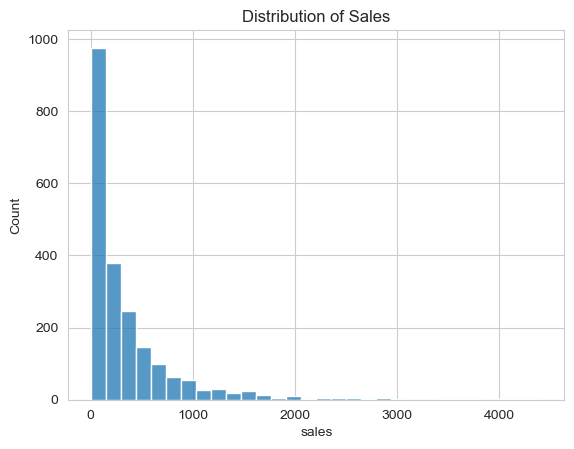

In [84]:
# EDA

# Sales distribution of store 

sns.histplot(df["sales"], bins=30)
plt.title("Distribution of Sales")
plt.show()


This confirms what was shown in df.info(), Sales values are right-skewed, with a median of ~182 and a mean of ~350, suggesting that most orders are small while a few large orders significantly increase total revenue.

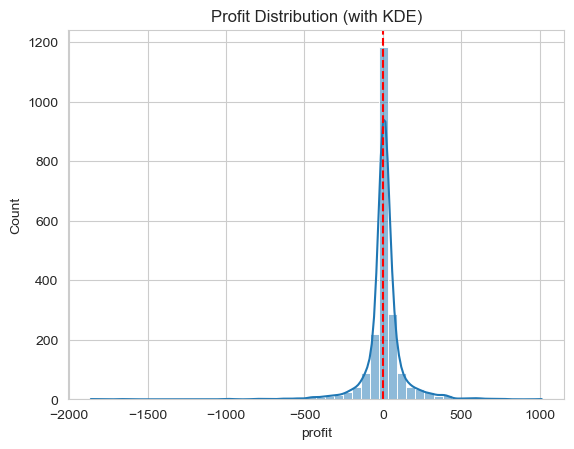

In [85]:
# Profit distribution

sns.histplot(
    df["profit"],
    bins=50,
    kde=True
)
plt.axvline(0, color="red", linestyle="--")
plt.title("Profit Distribution (with KDE)")
plt.show()

In [86]:
print(f"The % of losses are : {round((df["profit"] < 0).mean() * 100, 2)} " , "\n")
print(f"The % of profits are : {round((df["profit"] > 0).mean() * 100, 2)} " , "\n")

The % of losses are : 33.66  

The % of profits are : 64.78  



Most of the profits/losses are closer to 0, which is good and 64.78% are profits. 
Although losses are smaller 33.66% the KDE shows we have a loss close to -2000 which is never good for the store 

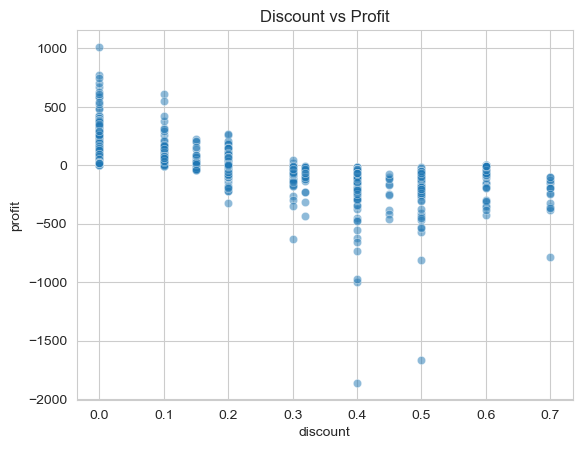

In [87]:
# Discounts vs Profits

sns.scatterplot(
    data=df,
    x="discount",
    y="profit",
    alpha=0.5
)
plt.title("Discount vs Profit")
plt.show()

This shows a clear negative relationship between discount levels and profitability.
Orders with low or no discounts are generally profitable, while higher discounts increasingly lead to losses.
Notably, the largest losses occur at discount levels of 40–50%, suggesting that maybe these discounts are hurting as due to bulk purchases, promotional campaigns, or inventory clearance
This highlights the need for stricter discount controls and margin-aware pricing strategies.

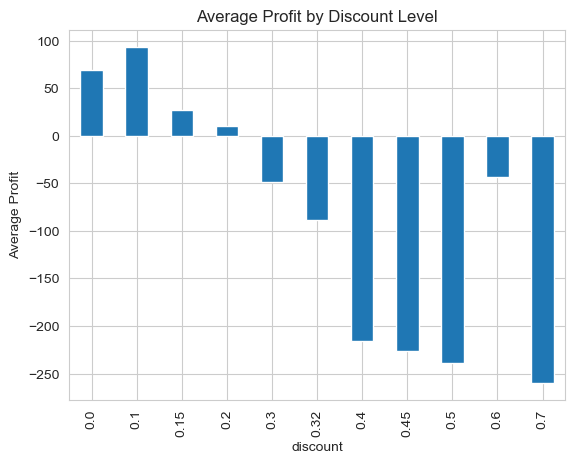

In [88]:
df.groupby("discount")["profit"].mean().plot(kind="bar")
plt.title("Average Profit by Discount Level")
plt.ylabel("Average Profit")
plt.show()

In [89]:
discount_summary = (
    df.groupby("discount")["profit"]
      .agg(["mean", "median", "count"])
      .reset_index()
)

discount_summary

,discount,mean,median,count
0,0.00,69.537173,26.0706,836
1,0.10,93.565946,56.8506,76
2,0.15,27.288298,14.0980,52
3,0.20,10.188535,6.3780,615
4,0.30,-48.177103,-27.4296,222
5,0.32,-88.560656,-46.9764,27
6,0.40,-215.831957,-120.0508,75
7,0.45,-226.646464,-167.3184,11
8,0.50,-238.355537,-187.2084,54
9,0.60,-43.077212,-12.0617,138


While individual orders at higher discount levels show wide variability in profit, 
the summary statistics confirm that discounts above ~30% are unprofitable on average.

The gap between mean and median profit at higher discount levels indicates that large 
loss-making orders are pulling down the average, while order counts decrease at extreme 
discounts, making these averages more sensitive to outliers.

In [90]:
# Business KPI's

kpis = {
    "Total Sales ($)": round(df["sales"].sum(),2),
    "Total Profit ($)": round(df["profit"].sum(),2),
    "Average Order Value ($)": round(df["sales"].mean(),2),
    "Average Discount (%)": round(df["discount"].mean(),2),
    "Profit Margin (%)": round( (df["profit"].sum() / df["sales"].sum()) * 100 , 2),
    "Loss-making Orders (%)": round( (df["profit"] < 0).mean() * 100, 2)
}

pd.DataFrame.from_dict(kpis, orient="index", columns=["Value"])

,Value
Total Sales ($),741999.80
Total Profit ($),18451.27
Average Order Value ($),349.83
Average Discount (%),0.17
Profit Margin (%),2.49
Loss-making Orders (%),33.66


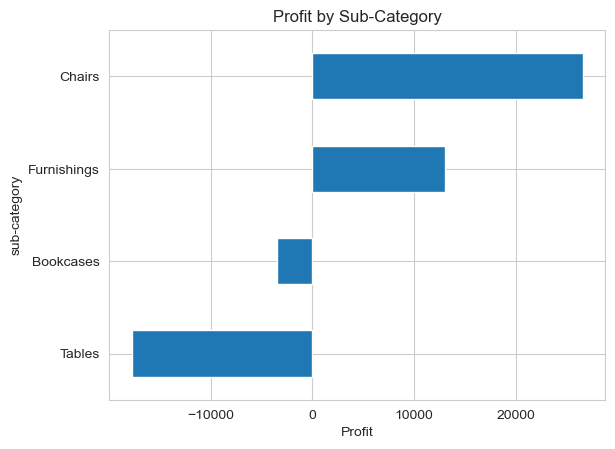

In [91]:
# profit by sub-category

subcat_profit = (
    df.groupby("sub-category")["profit"]
    .sum()
    .sort_values()
)

subcat_profit.plot(kind="barh")
plt.title("Profit by Sub-Category")
plt.xlabel("Profit")
plt.show()


Chairs are the most profitable sub-category by far, contributing the largest positive profit. 
This suggests strong demand, good pricing power, or healthy margins.

Furnishings are also consistently profitable, though at a much lower level than Chairs.
Likely stable products with controlled discounts and costs.

Bookcases are close to break-even but slightly unprofitable.
    
Tables are heavily loss-making, showing a significant negative profit.
Reasons could be Deep discounts to drive volume, High shipping or handling costs due to size/weight

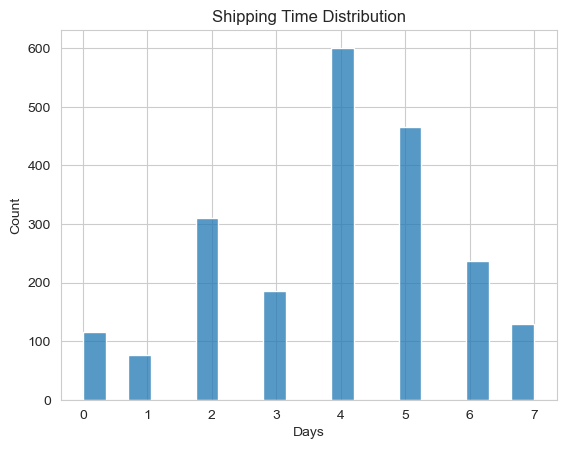

In [92]:
# Shipping time distribution

sns.histplot(df["shipping_time_days"], bins=20)
plt.title("Shipping Time Distribution")
plt.xlabel("Days")
plt.show()

Most orders are delivered within 3–5 days, with a clear peak around 4 days. Very fast (0–1 day) and slow (6–7 days) deliveries are less common, suggesting delivery times are fairly consistent with a small section of delays.

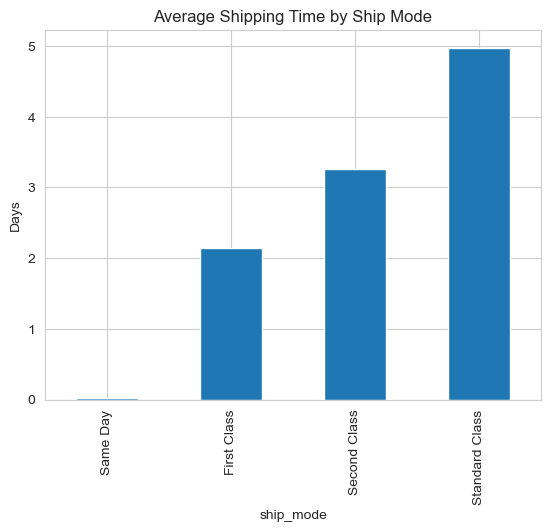

In [93]:
# Shipping mode performance 

shipping_perf = (
    df.groupby("ship_mode")["shipping_time_days"]
    .mean()
    .sort_values()
)

shipping_perf.plot(kind="bar")
plt.title("Average Shipping Time by Ship Mode")
plt.ylabel("Days")
plt.show()

Shipping time increases clearly by ship mode. Same Day deliveries are fastest, followed by First Class and Second Class, while Standard Class takes the longest on average. This reflects the expected trade-off between delivery speed and shipping cost.

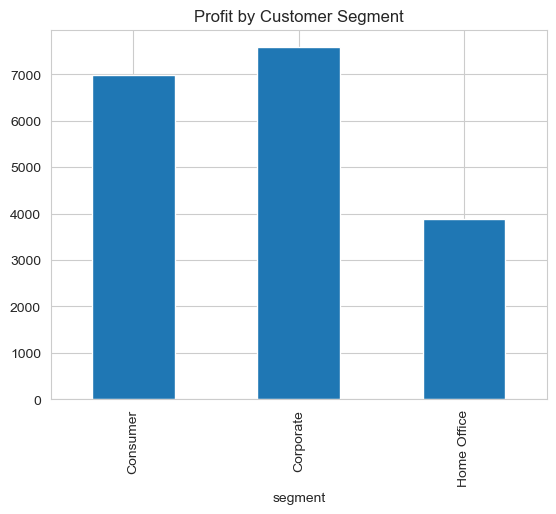

In [94]:
# Segment analysis 

segment_profit = df.groupby("segment")["profit"].sum()

segment_profit.plot(kind="bar")
plt.title("Profit by Customer Segment")
plt.show()

The Corporate segment generates the highest overall profit, indicating that business customers are the most valuable group for the company.

The Consumer segment also contributes strongly to profit, suggesting healthy demand and reasonable margins.

In contrast, the Home Office segment generates significantly lower profit, which may be due to smaller order sizes, higher discounts, or higher fulfillment costs.

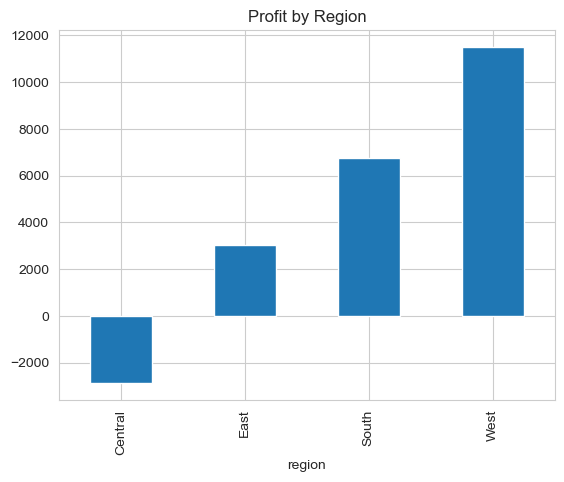

In [95]:
# Region Analysis 

region_profit = df.groupby("region")["profit"].sum()

region_profit.plot(kind="bar")
plt.title("Profit by Region")
plt.show()

The West region is the most profitable, showing strong sales performance and healthier margins compared to other regions.

The South and East regions are profitable but contribute less overall, indicating room for growth or optimization.

The Central region is operating at a loss, which points to potential issues such as heavy discounting, higher shipping costs, or less profitable product mix in that region.

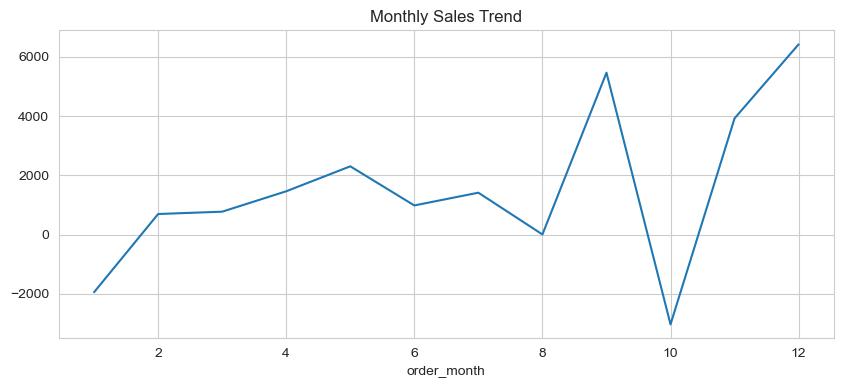

In [96]:
# Basic sales trend

df["order_month"] = df["order_date"].dt.month

monthly_sales = df.groupby("order_month")["profit"].sum()

monthly_sales.plot(figsize=(10,4))
plt.title("Monthly Sales Trend")
plt.show()


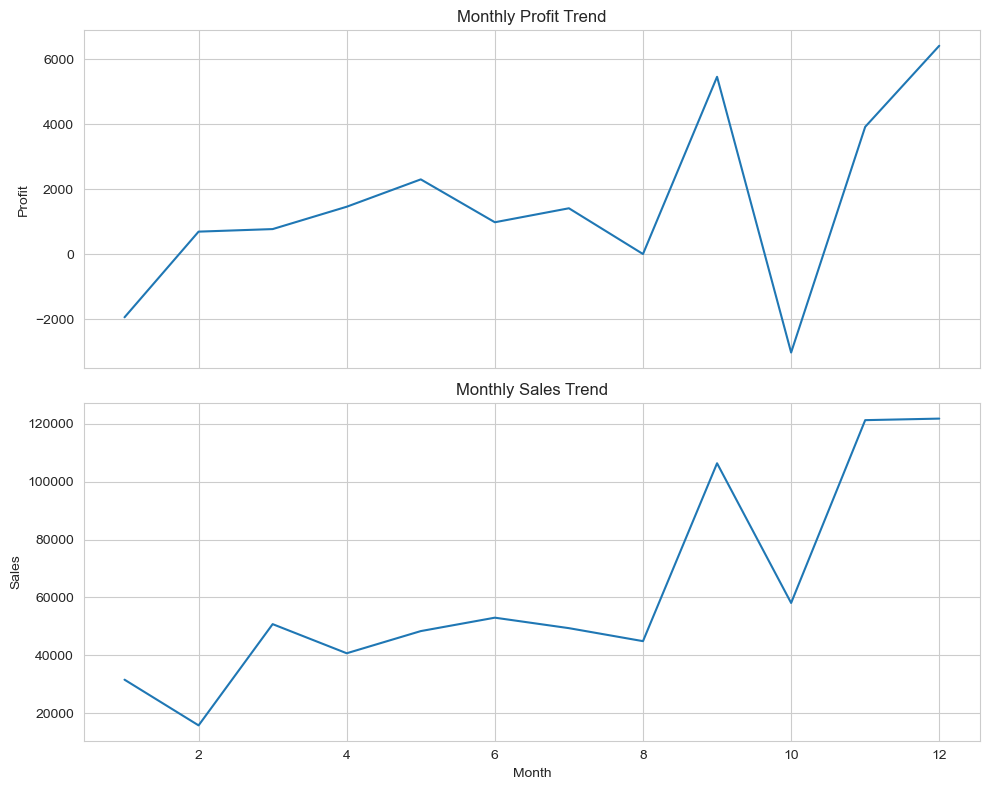

In [97]:
df["order_month"] = df["order_date"].dt.month

monthly_profit = df.groupby("order_month")["profit"].sum()
monthly_sales = df.groupby("order_month")["sales"].sum()

fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=True)

# Plot 1: Profit
axes[0].plot(monthly_profit)
axes[0].set_title("Monthly Profit Trend")
axes[0].set_ylabel("Profit")

# Plot 2: Sales
axes[1].plot(monthly_sales)
axes[1].set_title("Monthly Sales Trend")
axes[1].set_ylabel("Sales")
axes[1].set_xlabel("Month")

plt.tight_layout()
plt.show()

This chart shows total sales and profit aggregated by month across the years 2014–2018. Sales tend to be stronger in the later months of the year, particularly September through December, indicating consistent year-end demand across multiple years.

Profit generally follows the same pattern as sales but shows much higher volatility. While months with high sales often generate higher profits, there are notable exceptions where profit drops sharply despite strong revenue.

This suggests that profitability is influenced not only by sales volume but also by factors such as discounting, product mix, and operational costs, which vary across months.

Key Insights and Conclusion

Sales are highly right-skewed, with most orders being small while a few large transactions contribute disproportionately to total revenue. Profitability, however, is far more volatile than sales.

Approximately 33.7% of orders are loss-making, indicating that revenue growth does not consistently translate into profit. Losses are particularly driven by a subset of heavily discounted orders.

Discounting has a clear negative relationship with profitability. Orders with discounts above 30% are unprofitable on average, with the largest losses occurring at discount levels between 40–50%.

Sub-category analysis reveals strong differences in profitability. Chairs and Furnishings are consistently profitable, while Tables generate significant losses, likely due to deep discounting and higher shipping or handling costs.

Customer segment analysis shows that the Corporate segment contributes the highest total profit, followed by Consumer customers, while the Home Office segment underperforms.

Regional analysis highlights strong profitability in the West region, moderate performance in the South and East, and consistent losses in the Central region, suggesting regional pricing or cost inefficiencies.

Monthly trends show that while sales peak toward the end of the year, profit does not always follow the same pattern, indicating that profitability is influenced by discounting and product mix, not sales volume alone.

Overall, this analysis demonstrates that discount strategy, product mix, and customer segmentation are key drivers of profitability, and that aggressive discounting can significantly erode margins even in high-sales periods.